In [73]:
import pandas as pd
import os
from pathlib import Path
from IPython.display import display
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [129]:
J1_archive_data = pd.read_csv("fire_archive_J1V-C2_630368.csv")
SV_archive_data = pd.read_csv("fire_archive_SV-C2_630369.csv")
print(J1_archive_data.head())

   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0 -35.07001  143.30760      297.55  0.42   0.61  2020-06-01      1437   
1 -37.43536  142.58839      307.27  0.40   0.60  2020-06-01      1438   
2 -38.22930  147.17567      295.10  0.44   0.62  2020-06-02      1600   
3 -37.28864  141.12715      335.20  0.40   0.37  2020-06-03       420   
4 -35.75594  145.26987      327.99  0.43   0.38  2020-06-03       420   

  satellite instrument confidence  version  bright_t31    frp daynight  type  
0       N20      VIIRS          n        2      273.98   0.37        N     0  
1       N20      VIIRS          n        2      276.86   1.56        N     0  
2       N20      VIIRS          n        2      276.64   0.44        N     2  
3       N20      VIIRS          n        2      308.77  31.11        D     0  
4       N20      VIIRS          n        2      286.28   2.19        D     0  


In [130]:
J1_nrt_data = pd.read_csv("fire_nrt_J1V-C2_630368.csv")
display(J1_nrt_data.tail(15))
print(J1_nrt_data.dtypes)


,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
14054,-37.27685,141.02599,356.57,0.49,0.49,2025-06-01,353,N20,VIIRS,l,2.0NRT,288.15,13.42,D
14055,-37.27141,141.03670,339.75,0.49,0.49,2025-06-01,353,N20,VIIRS,n,2.0NRT,286.78,11.66,D
14056,-36.61008,142.85188,336.83,0.39,0.44,2025-06-01,353,N20,VIIRS,n,2.0NRT,289.44,2.59,D
14057,-37.27186,141.03105,356.16,0.49,0.49,2025-06-01,353,N20,VIIRS,n,2.0NRT,291.65,55.19,D
14058,-37.27232,141.02539,350.87,0.49,0.49,2025-06-01,353,N20,VIIRS,n,2.0NRT,300.94,55.19,D
14059,-37.27277,141.01971,332.90,0.50,0.49,2025-06-01,353,N20,VIIRS,n,2.0NRT,300.10,34.22,D
14060,-37.26779,141.02480,337.20,0.49,0.49,2025-06-01,353,N20,VIIRS,n,2.0NRT,306.27,55.19,D
14061,-37.26824,141.01913,329.51,0.50,0.49,2025-06-01,353,N20,VIIRS,n,2.0NRT,291.73,34.22,D
14062,-37.27494,141.03625,341.73,0.49,0.49,2025-06-01,353,N20,VIIRS,n,2.0NRT,288.50,19.84,D
14063,-36.61505,147.42073,299.51,0.40,0.37,2025-06-01,1514,N20,VIIRS,n,2.0NRT,268.63,0.57,N


latitude      float64
longitude     float64
brightness    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence     object
version        object
bright_t31    float64
frp           float64
daynight       object
dtype: object


In [131]:
def dates_to_datetime(df):
    '''Converts the acq_date column to datetime format for given dataframe'''
    
    df['acq_date'] = pd.to_datetime(df['acq_date'], errors='coerce', format='%Y-%m-%d')
    print('Converted acq_date column values to datetime format for given dataframe')

def print_min_max(df):
    """Prints the minimum and maximum dates in the dataframe"""
    
    min_date = df['acq_date'].min()
    max_date = df['acq_date'].max()
    print(f"  Start Date: {min_date}")
    print(f"  End Date: {max_date}")



In [132]:
datasets = [J1_archive_data, SV_archive_data, J1_nrt_data]
for dataset in datasets:
    dates_to_datetime(dataset)
    
print_min_max(J1_archive_data)
print_min_max(SV_archive_data)
print_min_max(J1_nrt_data)

Converted acq_date column values to datetime format for given dataframe
Converted acq_date column values to datetime format for given dataframe
Converted acq_date column values to datetime format for given dataframe
  Start Date: 2020-06-01 00:00:00
  End Date: 2025-02-28 00:00:00
  Start Date: 2020-06-01 00:00:00
  End Date: 2025-02-28 00:00:00
  Start Date: 2025-03-01 00:00:00
  End Date: 2025-06-01 00:00:00


In [133]:
# Combining Fire datasets
combined_fires_df = pd.concat([J1_archive_data, SV_archive_data], ignore_index=True)
# Sort the combined dataframe by acq_date and acq_time
combined_fires_df.sort_values(by=['acq_date', 'acq_time'], inplace=True)


In [134]:
# FIRMS DATA CLEANING

# Removing the fires with 'n and l' confidence level (most likely to be false positives)
valid_confidence_levels = ['h']
combined_fires_df = combined_fires_df[combined_fires_df['confidence'].isin(valid_confidence_levels)]

# Make a datetime column and set it as the index

date_as_string = combined_fires_df['acq_date'].astype(str)
time_as_string = combined_fires_df['acq_time'].astype(str).str.zfill(4)
datetime_string = date_as_string + ' ' + time_as_string
combined_fires_df['datetime'] = pd.to_datetime(datetime_string, format='%Y-%m-%d %H%M')

# Sort the dataframe by the datetime column
combined_fires_df.sort_values(by='datetime', inplace=True)
# Set the datetime column as the index
combined_fires_df.set_index('datetime', inplace=True)
# checking FIRMS data for null values
print(combined_fires_df.isnull().sum())
# Checking FIRMS data for duplicates
FIRMS_duplicates = combined_fires_df.duplicated().sum()
print(f"Number of duplicate rows in FIRMS data: {FIRMS_duplicates}")
# performing a check for logical duplicates on key columns.
key_cols = ['latitude', 'longitude', 'acq_date', 'acq_time']
subset_duplicates = combined_fires_df.duplicated(subset=key_cols).sum()
print(f"Number of logical duplicates in FIRMS data: {subset_duplicates}")

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64
Number of duplicate rows in FIRMS data: 0
Number of logical duplicates in FIRMS data: 0


In [135]:
combined_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15081 entries, 2020-06-03 03:29:00 to 2025-02-27 04:56:00
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   latitude    15081 non-null  float64       
 1   longitude   15081 non-null  float64       
 2   brightness  15081 non-null  float64       
 3   scan        15081 non-null  float64       
 4   track       15081 non-null  float64       
 5   acq_date    15081 non-null  datetime64[ns]
 6   acq_time    15081 non-null  int64         
 7   satellite   15081 non-null  object        
 8   instrument  15081 non-null  object        
 9   confidence  15081 non-null  object        
 10  version     15081 non-null  int64         
 11  bright_t31  15081 non-null  float64       
 12  frp         15081 non-null  float64       
 13  daynight    15081 non-null  object        
 14  type        15081 non-null  int64         
dtypes: datetime64[ns](1), float64(7), i

In [136]:
# Truncating the FIRMS data from 1st June 2020 to 31st May 2024
start_date = '2021-01-01'
end_date = '2023-12-31'
combined_fires_trunc = combined_fires_df.loc[start_date:end_date].copy()

In [137]:
# Feature Engineering: Adding a season column
seasons_by_month = {
    12: 'Summer', 1: 'Summer', 2: 'Summer',
    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
    6: 'Winter', 7: 'Winter', 8: 'Winter',
    9: 'Spring', 10: 'Spring', 11: 'Spring'
}

combined_fires_trunc['season'] = combined_fires_trunc['acq_date'].dt.month.map(seasons_by_month)

# checking the season column
print("Number of fires by season:")
print(combined_fires_trunc['season'].value_counts())

# checking the season column for null values
print("Number of null values in the season column:", combined_fires_trunc['season'].isnull().sum())

Number of fires by season:
season
Autumn    7314
Summer     441
Spring     349
Winter      47
Name: count, dtype: int64
Number of null values in the season column: 0


In [138]:
# Removing duplicates by removing the row with lower confidence for same observation time
key_cols = ['latitude', 'longitude', 'acq_date', 'acq_time']
final_fire_df = combined_fires_trunc.drop_duplicates(subset=key_cols, keep='first')

In [139]:
# Zero Vegetation Filter
final_fire_df = final_fire_df[final_fire_df['type'] == 0]

In [140]:
# Initial data exploration
display(final_fire_df.describe())

,latitude,longitude,brightness,scan,track,acq_date,acq_time,version,bright_t31,frp,type
count,8140.000000,8140.000000,8140.0,8140.000000,8140.000000,8140,8140.000000,8140.0,8140.000000,8140.000000,8140.0
mean,-36.862684,143.653299,367.0,0.468918,0.578977,2022-04-19 18:18:55.724815872,446.723833,2.0,304.127582,33.690862,0.0
min,-38.938120,140.963120,367.0,0.320000,0.360000,2021-01-19 00:00:00,251.000000,2.0,275.350000,0.000000,0.0
25%,-37.610860,142.312993,367.0,0.380000,0.520000,2021-04-16 00:00:00,341.000000,2.0,296.457500,10.990000,0.0
50%,-36.798080,143.319425,367.0,0.430000,0.590000,2022-03-29 00:00:00,451.000000,2.0,300.625000,17.280000,0.0
75%,-36.260987,144.986472,367.0,0.530000,0.660000,2023-04-04 00:00:00,510.000000,2.0,306.240000,32.795000,0.0
max,-34.073350,149.253310,367.0,0.800000,0.780000,2023-12-23 00:00:00,1606.000000,2.0,371.710000,941.750000,0.0
std,0.802984,1.797975,0.0,0.117906,0.114298,NaN,142.203568,0.0,12.951001,47.801802,0.0


In [141]:
# print count values of final_fire_df by season
print(final_fire_df['season'].value_counts())

season
Autumn    7312
Summer     437
Spring     344
Winter      47
Name: count, dtype: int64


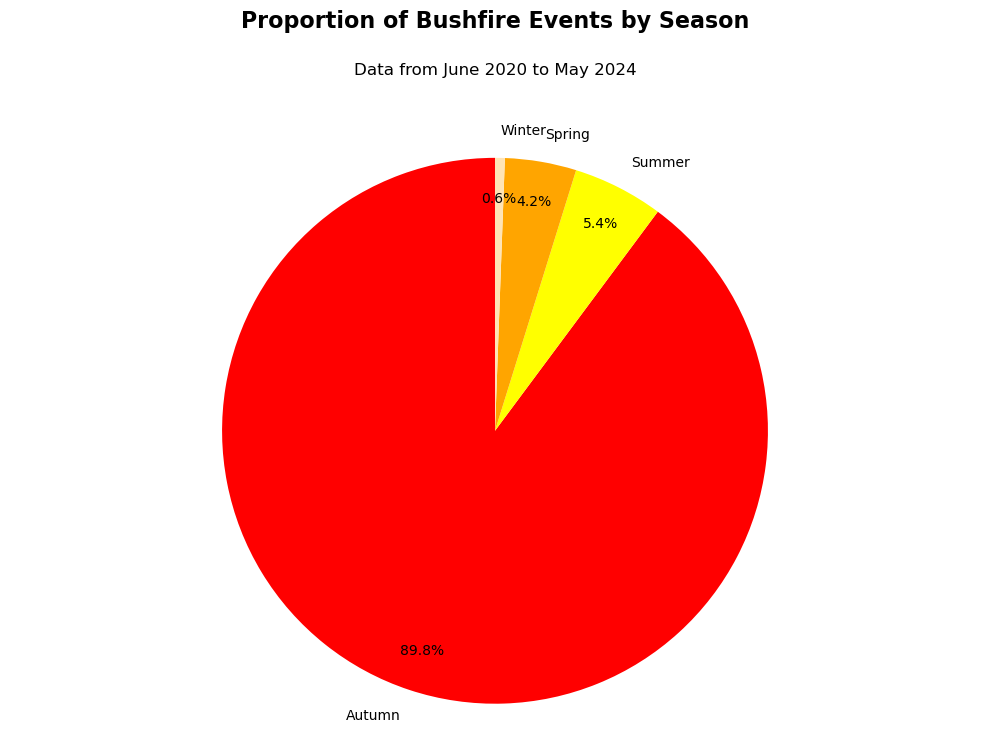

In [142]:
season_counts = final_fire_df['season'].value_counts()

color_map = {
    'Autumn': 'red',
    'Spring': 'orange',
    'Summer': 'yellow',  
    'Winter': 'moccasin'
}

fire_num_colors = [color_map[season] for season in season_counts.index]

# Creates the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 8))

# Creates the pie chart on the axes 'ax'
ax.pie(
    season_counts,
    labels=season_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    colors = fire_num_colors
)
ax.axis('equal')

# Main Title (for the whole figure)
fig.suptitle(
    "Proportion of Bushfire Events by Season",
    y=0.95,  # Adjust vertical position of the main title (1.0 is top)
    fontweight='bold',
    fontsize=16
)

# Subtitle (for plot)
ax.set_title(
    "Data from June 2020 to May 2024",
    pad=40,  # Adds padding between this subtitle and the chart
    fontsize=12
)

# Adjusts layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.savefig(
    './visualizations/fires_by_season.png',
    dpi=300,               # Sets image resolution to high-quality
    bbox_inches='tight'    # Trims excess whitespace around plot
)

plt.show()


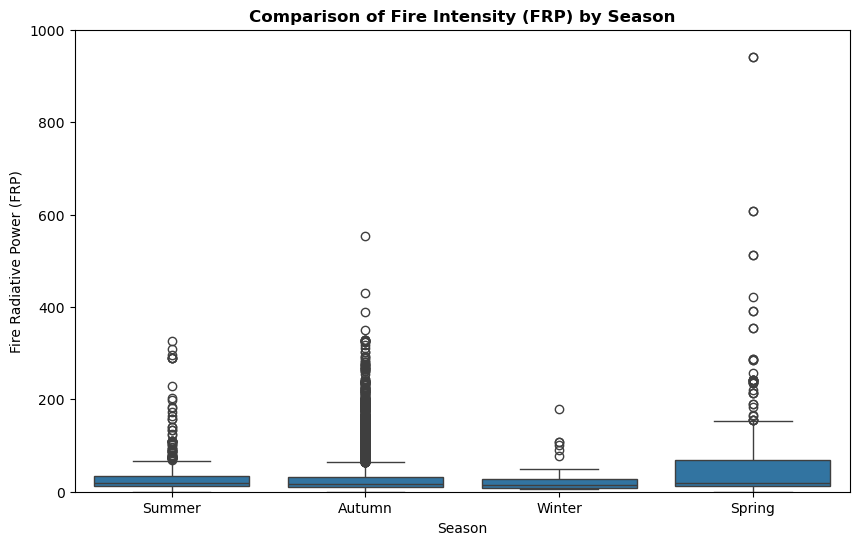

In [177]:
# Boxplot for Comparison of Fire Intensity by Season for Final FIRMS Data
import seaborn as sns
import matplotlib.pyplot as plt

# Order of seasons for the plot
season_order = ['Summer', 'Autumn', 'Winter', 'Spring']

plt.figure(figsize=(10, 6))
sns.boxplot(data=final_fire_df, x='season', y='frp', order=season_order)

plt.title('Comparison of Fire Intensity (FRP) by Season', fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Fire Radiative Power (FRP)')

# Limiting the y-axis to see the main distribution clearly, as outliers can be extreme
plt.ylim(0, 1000) # Adjust value as needed based on data

plt.show()

In [144]:
# saving final_fire_df to a csv file
final_fire_df.to_parquet('final_fire_df.parquet')

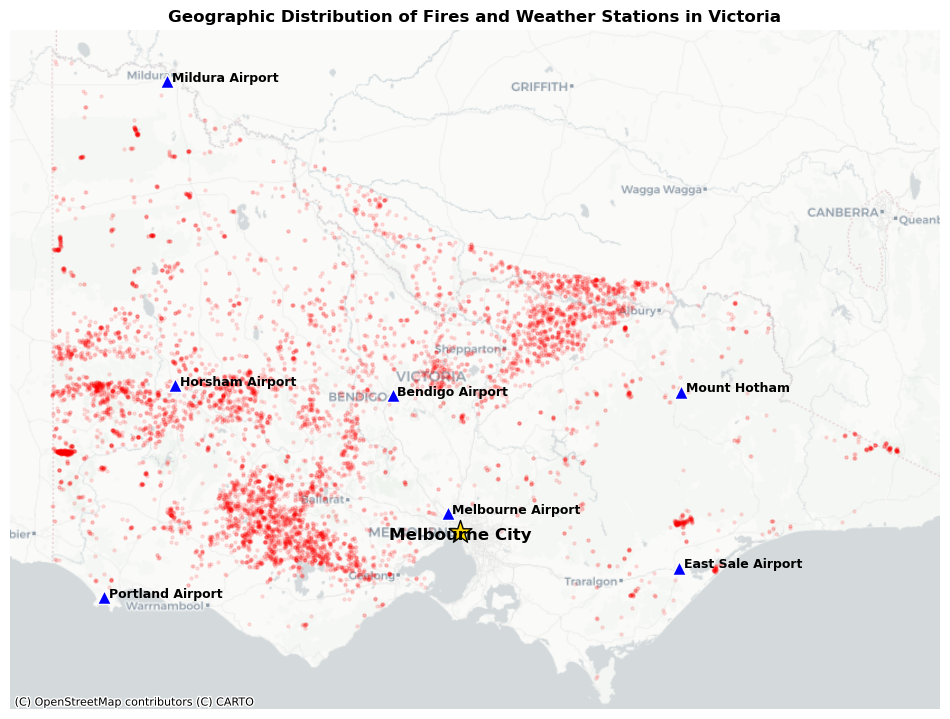

In [147]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

# Melbourne city data
melbourne_data = {
    'name': ['Melbourne City'],
    'latitude': [-37.8136],
    'longitude': [144.9631]
}
melbourne_df = pd.DataFrame(melbourne_data)
melbourne_gdf = gpd.GeoDataFrame(
    melbourne_df,
    geometry=gpd.points_from_xy(melbourne_df.longitude, melbourne_df.latitude),
    crs="EPSG:4326"
)

# Code to define and create the weather station GeoDataFrame
station_data = {
    'name': ['Melbourne Airport', 'Mildura Airport', 'East Sale Airport', 
             'Bendigo Airport', 'Mount Hotham', 'Horsham Airport', 'Portland Airport'],
    'latitude': [-37.67, -34.24, -38.09, -36.75, -36.72, -36.67, -38.32],
    'longitude': [144.84, 142.09, 147.11, 144.3, 147.13, 142.17, 141.47]
}
stations_df = pd.DataFrame(station_data)
stations_gdf = gpd.GeoDataFrame(
    stations_df,
    geometry=gpd.points_from_xy(stations_df.longitude, stations_df.latitude),
    crs="EPSG:4326"
)

# Create the GeoDataFrame for the fires
fires_gdf = gpd.GeoDataFrame(
    final_fire_df,
    geometry=gpd.points_from_xy(final_fire_df.longitude, final_fire_df.latitude),
    crs="EPSG:4326" 
)

# Plot the data
fig, ax = plt.subplots(figsize=(12, 12))

# We convert the EPSG:4326 format to EPSG:3857 (Web Mercator) format
fires_gdf.to_crs(epsg=3857).plot(
    ax=ax,
    marker='o',
    color='red',
    markersize=5,
    alpha=0.1
)

# Code to plot the weather stations on the same map
stations_gdf.to_crs(epsg=3857).plot(
    ax=ax,
    marker='^',
    color='blue',
    markersize=100,
    edgecolor='white'
)

# Code to plot the Melbourne city marker
melbourne_gdf.to_crs(epsg=3857).plot(
    ax=ax,
    marker='*',          # Use a star marker for the capital city
    color='gold',
    markersize=300,
    edgecolor='black'
)

# Adding a basemap from Contextily
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron) 

# Code to add text labels for each weather station

# We convert lat/long data to the Web Mercator (x,y) format
stations_projected = stations_gdf.to_crs(epsg=3857)

for idx, row in stations_projected.iterrows():
    ax.text(
        row.geometry.x + 5000, # Adds a slight offset to the x-coordinate
        row.geometry.y,
        row['name'],
        fontsize=9,
        fontweight='bold',
        ha='left' # Aligns text to the left of the point
    )

# Code to add the Melbourne city label
melbourne_projected = melbourne_gdf.to_crs(epsg=3857).iloc[0]
ax.text(
    melbourne_projected.geometry.x,
    melbourne_projected.geometry.y - 8000, # Offsets text below the marker
    melbourne_projected['name'],
    fontsize=12,
    fontweight='bold',
    ha='center' # Centers the text below the point
)

# Updated the title to reflect the new data plotted
ax.set_title('Geographic Distribution of Fires and Weather Stations in Victoria', fontweight='bold')

ax.set_axis_off() 
plt.show()

In [40]:
# Fetching hourly weather data from the Open-Meteo API
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import json

def get_hourly_weather_data():
    """
    Method to get hourly weather data using direct HTTP requests.
    """
    base_url = "https://archive-api.open-meteo.com/v1/archive"
    
    # Victoria coordinates
    locations = [
        {"name": "Melbourne Airport", "lat": -37.67, "lon": 144.84},
        {"name": "Mildura Airport", "lat": -34.24, "lon": 142.09},
        {"name": "East Sale Airport", "lat": -38.09, "lon": 147.11},
        {"name": "Bendigo Airport", "lat": -36.75, "lon": 144.3},
        {"name": "Mount Hotham", "lat": -36.72, "lon": 147.13},
        {"name": "Horsham Airport", "lat": -36.67, "lon": 142.17},
        {"name": "Portland Airport", "lat": -38.32, "lon": 141.47}
    ]
    
    all_hourly_data = []
    
    for i, location in enumerate(locations):
        print(f"Fetching hourly data for {location['name']} ({location['lat']}, {location['lon']})")
        
        # Parameters for the API call for hourly data
        params = {
            "latitude": location['lat'],
            "longitude": location['lon'],
            "start_date": "2020-06-01",
            "end_date": "2025-02-28",
            "hourly": ["temperature_2m", "relative_humidity_2m", "wind_speed_10m", 
                       "wind_direction_10m", "wind_gusts_10m", "precipitation", 
                       "vapour_pressure_deficit"],
            "timezone": "Australia/Melbourne"
        }
        
        try:
            response = requests.get(base_url, params=params)
            response.raise_for_status()
            data = response.json()
            
            # Process hourly data
            if 'hourly' in data:
                hourly_times = pd.to_datetime(data['hourly']['time'])
                hourly_df = pd.DataFrame({
                    'location_id': i,
                    'location_name': location['name'],
                    'latitude': location['lat'],
                    'longitude': location['lon'],
                    'date': hourly_times,
                    'temperature_2m': data['hourly']['temperature_2m'],
                    'relative_humidity_2m': data['hourly']['relative_humidity_2m'],
                    'wind_speed_10m': data['hourly']['wind_speed_10m'],
                    'wind_direction_10m': data['hourly']['wind_direction_10m'],
                    'wind_gusts_10m': data['hourly']['wind_gusts_10m'],
                    'precipitation': data['hourly']['precipitation'],
                    'vapour_pressure_deficit': data['hourly']['vapour_pressure_deficit']
                })
                all_hourly_data.append(hourly_df)
                
        except Exception as e:
            print(f"Error fetching data for {location['name']}: {e}")
            continue
    
    # Combine all hourly data
    if all_hourly_data:
        combined_hourly = pd.concat(all_hourly_data, ignore_index=True)
        print(f"Combined hourly data shape: {combined_hourly.shape}")
    else:
        combined_hourly = pd.DataFrame()
    
    return combined_hourly

print("Fetching hourly weather data...")
hourly_weather = get_hourly_weather_data()
print("\nHourly weather data sample:")
print(hourly_weather.head() if not hourly_weather.empty else "No data")

Fetching hourly weather data...
Fetching hourly data for Melbourne Airport (-37.67, 144.84)
Fetching hourly data for Mildura Airport (-34.24, 142.09)
Fetching hourly data for East Sale Airport (-38.09, 147.11)
Fetching hourly data for Bendigo Airport (-36.75, 144.3)
Fetching hourly data for Mount Hotham (-36.72, 147.13)
Fetching hourly data for Horsham Airport (-36.67, 142.17)
Fetching hourly data for Portland Airport (-38.32, 141.47)
Combined hourly data shape: (291312, 12)

Hourly weather data sample:
   location_id      location_name  latitude  longitude                date  \
0            0  Melbourne Airport    -37.67     144.84 2020-06-01 00:00:00   
1            0  Melbourne Airport    -37.67     144.84 2020-06-01 01:00:00   
2            0  Melbourne Airport    -37.67     144.84 2020-06-01 02:00:00   
3            0  Melbourne Airport    -37.67     144.84 2020-06-01 03:00:00   
4            0  Melbourne Airport    -37.67     144.84 2020-06-01 04:00:00   

   temperature_2m  rel

In [42]:
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import json

def get_daily_weather_data():
    """
    Method to get daily weather data using direct HTTP requests.
    """
    base_url = "https://archive-api.open-meteo.com/v1/archive"
    
    # Victoria coordinates
    locations = [
        {"name": "Melbourne Airport", "lat": -37.67, "lon": 144.84},
        {"name": "Mildura Airport", "lat": -34.24, "lon": 142.09},
        {"name": "East Sale Airport", "lat": -38.09, "lon": 147.11},
        {"name": "Bendigo Airport", "lat": -36.75, "lon": 144.3},
        {"name": "Mount Hotham", "lat": -36.72, "lon": 147.13},
        {"name": "Horsham Airport", "lat": -36.67, "lon": 142.17},
        {"name": "Portland Airport", "lat": -38.32, "lon": 141.47}
    ]
    
    all_daily_data = []
    
    for i, location in enumerate(locations):
        print(f"Fetching daily data for {location['name']} ({location['lat']}, {location['lon']})")
        
        # Parameters for the API call for daily data
        params = {
            "latitude": location['lat'],
            "longitude": location['lon'],
            "start_date": "2020-06-01",
            "end_date": "2025-02-28",
            "daily": ["temperature_2m_min", "relative_humidity_2m_min", "relative_humidity_2m_max", 
                      "wind_speed_10m_max", "wind_direction_10m_dominant", "wind_gusts_10m_max", 
                      "precipitation_sum", "shortwave_radiation_sum", "temperature_2m_max"],
            "timezone": "Australia/Melbourne"
        }
        
        try:
            response = requests.get(base_url, params=params)
            response.raise_for_status()
            data = response.json()
            
            # Process daily data
            if 'daily' in data:
                daily_times = pd.to_datetime(data['daily']['time'])
                daily_df = pd.DataFrame({
                    'location_id': i,
                    'location_name': location['name'],
                    'latitude': location['lat'],
                    'longitude': location['lon'],
                    'date': daily_times,
                    'temperature_2m_min': data['daily']['temperature_2m_min'],
                    'relative_humidity_2m_min': data['daily']['relative_humidity_2m_min'],
                    'relative_humidity_2m_max': data['daily']['relative_humidity_2m_max'],
                    'wind_speed_10m_max': data['daily']['wind_speed_10m_max'],
                    'wind_direction_10m_dominant': data['daily']['wind_direction_10m_dominant'],
                    'wind_gusts_10m_max': data['daily']['wind_gusts_10m_max'],
                    'precipitation_sum': data['daily']['precipitation_sum'],
                    'shortwave_radiation_sum': data['daily']['shortwave_radiation_sum'],
                    'temperature_2m_max': data['daily']['temperature_2m_max']
                })
                all_daily_data.append(daily_df)
                
        except Exception as e:
            print(f"Error fetching data for {location['name']}: {e}")
            continue
    
    # Combine all daily data
    if all_daily_data:
        combined_daily = pd.concat(all_daily_data, ignore_index=True)
        print(f"Combined daily data shape: {combined_daily.shape}")
    else:
        combined_daily = pd.DataFrame()
    
    return combined_daily

print("Fetching daily weather data...")
daily_weather = get_daily_weather_data()
print("\nDaily weather data sample:")
print(daily_weather.head() if not daily_weather.empty else "No data")

Fetching daily weather data...
Fetching daily data for Melbourne Airport (-37.67, 144.84)
Fetching daily data for Mildura Airport (-34.24, 142.09)
Error fetching data for Mildura Airport: 429 Client Error: Too Many Requests for url: https://archive-api.open-meteo.com/v1/archive?latitude=-34.24&longitude=142.09&start_date=2020-06-01&end_date=2025-02-28&daily=temperature_2m_min&daily=relative_humidity_2m_min&daily=relative_humidity_2m_max&daily=wind_speed_10m_max&daily=wind_direction_10m_dominant&daily=wind_gusts_10m_max&daily=precipitation_sum&daily=shortwave_radiation_sum&daily=temperature_2m_max&timezone=Australia%2FMelbourne
Fetching daily data for East Sale Airport (-38.09, 147.11)
Error fetching data for East Sale Airport: 429 Client Error: Too Many Requests for url: https://archive-api.open-meteo.com/v1/archive?latitude=-38.09&longitude=147.11&start_date=2020-06-01&end_date=2025-02-28&daily=temperature_2m_min&daily=relative_humidity_2m_min&daily=relative_humidity_2m_max&daily=wind

In [67]:
display(daily_weather.head())
display(hourly_weather.head())

,location_id,location_name,latitude,longitude,date,temperature_2m_min,relative_humidity_2m_min,relative_humidity_2m_max,wind_speed_10m_max,wind_direction_10m_dominant,wind_gusts_10m_max,precipitation_sum,shortwave_radiation_sum,temperature_2m_max
0,0,Melbourne Airport,-37.67,144.84,2020-06-01,7.5,68,91,32.5,285,59.0,11.7,2.43,10.7
1,0,Melbourne Airport,-37.67,144.84,2020-06-02,7.6,68,84,25.6,273,46.4,0.7,4.56,12.9
2,0,Melbourne Airport,-37.67,144.84,2020-06-03,6.9,60,88,28.2,208,50.8,0.9,5.23,11.6
3,0,Melbourne Airport,-37.67,144.84,2020-06-04,5.0,66,92,9.5,225,16.2,0.0,8.86,12.3
4,0,Melbourne Airport,-37.67,144.84,2020-06-05,3.1,65,94,10.1,338,16.9,0.0,9.44,13.3


,location_id,location_name,latitude,longitude,date,temperature_2m,relative_humidity_2m,wind_speed_10m,wind_direction_10m,wind_gusts_10m,precipitation,vapour_pressure_deficit
0,0,Melbourne Airport,-37.67,144.84,2020-06-01 00:00:00,10.7,81,21.3,355,36.7,0.0,0.25
1,0,Melbourne Airport,-37.67,144.84,2020-06-01 01:00:00,10.3,81,23.0,1,39.6,0.0,0.23
2,0,Melbourne Airport,-37.67,144.84,2020-06-01 02:00:00,10.3,78,25.2,3,42.5,0.0,0.27
3,0,Melbourne Airport,-37.67,144.84,2020-06-01 03:00:00,9.9,81,28.9,355,49.7,0.6,0.23
4,0,Melbourne Airport,-37.67,144.84,2020-06-01 04:00:00,9.5,86,30.2,1,59.0,1.2,0.16


In [68]:
display(daily_weather.tail())
display(hourly_weather.tail())

,location_id,location_name,latitude,longitude,date,temperature_2m_min,relative_humidity_2m_min,relative_humidity_2m_max,wind_speed_10m_max,wind_direction_10m_dominant,wind_gusts_10m_max,precipitation_sum,shortwave_radiation_sum,temperature_2m_max
12133,6,Portland Airport,-38.32,141.47,2025-02-24,15.1,61,83,19.1,214,36.4,0.4,17.68,18.5
12134,6,Portland Airport,-38.32,141.47,2025-02-25,13.5,65,90,22.2,100,46.8,0.0,26.47,20.2
12135,6,Portland Airport,-38.32,141.47,2025-02-26,15.7,48,94,22.3,275,46.8,0.4,22.47,21.8
12136,6,Portland Airport,-38.32,141.47,2025-02-27,15.0,62,92,17.6,197,34.9,0.6,18.71,19.7
12137,6,Portland Airport,-38.32,141.47,2025-02-28,14.9,66,91,24.9,271,44.3,0.6,22.07,19.8


,location_id,location_name,latitude,longitude,date,temperature_2m,relative_humidity_2m,wind_speed_10m,wind_direction_10m,wind_gusts_10m,precipitation,vapour_pressure_deficit
291307,6,Portland Airport,-38.32,141.47,2025-02-28 19:00:00,17.0,75,14.2,258,30.2,0.0,0.49
291308,6,Portland Airport,-38.32,141.47,2025-02-28 20:00:00,16.7,73,13.4,259,25.6,0.0,0.52
291309,6,Portland Airport,-38.32,141.47,2025-02-28 21:00:00,16.6,71,12.9,262,23.4,0.0,0.54
291310,6,Portland Airport,-38.32,141.47,2025-02-28 22:00:00,16.3,71,12.3,273,22.3,0.0,0.54
291311,6,Portland Airport,-38.32,141.47,2025-02-28 23:00:00,14.9,76,9.0,282,16.9,0.0,0.40


In [ ]:
# Haven't done any cleaning, have just sourced from API

hourly_weather.to_parquet('hourly_weather.parquet')
daily_weather.to_parquet('daily_weather.parquet')

In [148]:
hourly_weather = pd.read_parquet('hourly_weather.parquet')
daily_weather = pd.read_parquet('daily_weather.parquet')

In [149]:
display(hourly_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291312 entries, 0 to 291311
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   location_id              291312 non-null  int64         
 1   location_name            291312 non-null  object        
 2   latitude                 291312 non-null  float64       
 3   longitude                291312 non-null  float64       
 4   date                     291312 non-null  datetime64[ns]
 5   temperature_2m           291312 non-null  float64       
 6   relative_humidity_2m     291312 non-null  int64         
 7   wind_speed_10m           291312 non-null  float64       
 8   wind_direction_10m       291312 non-null  int64         
 9   wind_gusts_10m           291312 non-null  float64       
 10  precipitation            291312 non-null  float64       
 11  vapour_pressure_deficit  291312 non-null  float64       
 12  season          

None

In [150]:
display(daily_weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   location_id                  12138 non-null  int64         
 1   location_name                12138 non-null  object        
 2   latitude                     12138 non-null  float64       
 3   longitude                    12138 non-null  float64       
 4   date                         12138 non-null  datetime64[ns]
 5   temperature_2m_min           12138 non-null  float64       
 6   relative_humidity_2m_min     12138 non-null  int64         
 7   relative_humidity_2m_max     12138 non-null  int64         
 8   wind_speed_10m_max           12138 non-null  float64       
 9   wind_direction_10m_dominant  12138 non-null  int64         
 10  wind_gusts_10m_max           12138 non-null  float64       
 11  precipitation_sum            12138 non-nu

None

In [151]:
# Checking for any duplicate values in hourly and daily weather data
key_cols = ['location_name', 'date']
hourly_duplicate_rows = hourly_weather.duplicated(subset=key_cols).sum()
print(f"Found {hourly_duplicate_rows} duplicate rows for hourly weather data.")

daily_duplicate_rows = daily_weather.duplicated(subset=key_cols).sum()
print(f"Found {daily_duplicate_rows} duplicate rows for daily weather data.")

Found 0 duplicate rows for hourly weather data.
Found 0 duplicate rows for daily weather data.


In [152]:
# Feature Engineering Season column for daily weather data
season_map = {
    12: 'Summer', 1: 'Summer', 2: 'Summer',
    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
    6: 'Winter', 7: 'Winter', 8: 'Winter',
    9: 'Spring', 10: 'Spring', 11: 'Spring'
}

daily_weather['season'] = daily_weather['date'].dt.month.map(season_map)

In [153]:
display(daily_weather.tail())

,location_id,location_name,latitude,longitude,date,temperature_2m_min,relative_humidity_2m_min,relative_humidity_2m_max,wind_speed_10m_max,wind_direction_10m_dominant,wind_gusts_10m_max,precipitation_sum,shortwave_radiation_sum,temperature_2m_max,season
12133,6,Portland Airport,-38.32,141.47,2025-02-24,15.1,61,83,19.1,214,36.4,0.4,17.68,18.5,Summer
12134,6,Portland Airport,-38.32,141.47,2025-02-25,13.5,65,90,22.2,100,46.8,0.0,26.47,20.2,Summer
12135,6,Portland Airport,-38.32,141.47,2025-02-26,15.7,48,94,22.3,275,46.8,0.4,22.47,21.8,Summer
12136,6,Portland Airport,-38.32,141.47,2025-02-27,15.0,62,92,17.6,197,34.9,0.6,18.71,19.7,Summer
12137,6,Portland Airport,-38.32,141.47,2025-02-28,14.9,66,91,24.9,271,44.3,0.6,22.07,19.8,Summer


In [154]:
# Similarly engineer season column for hourly weather data
hourly_weather['season'] = hourly_weather['date'].dt.month.map(season_map)

In [155]:
display(hourly_weather.tail())

,location_id,location_name,latitude,longitude,date,temperature_2m,relative_humidity_2m,wind_speed_10m,wind_direction_10m,wind_gusts_10m,precipitation,vapour_pressure_deficit,season
291307,6,Portland Airport,-38.32,141.47,2025-02-28 19:00:00,17.0,75,14.2,258,30.2,0.0,0.49,Summer
291308,6,Portland Airport,-38.32,141.47,2025-02-28 20:00:00,16.7,73,13.4,259,25.6,0.0,0.52,Summer
291309,6,Portland Airport,-38.32,141.47,2025-02-28 21:00:00,16.6,71,12.9,262,23.4,0.0,0.54,Summer
291310,6,Portland Airport,-38.32,141.47,2025-02-28 22:00:00,16.3,71,12.3,273,22.3,0.0,0.54,Summer
291311,6,Portland Airport,-38.32,141.47,2025-02-28 23:00:00,14.9,76,9.0,282,16.9,0.0,0.40,Summer


In [156]:
daily_weather.to_parquet('daily_weather.parquet')
hourly_weather.to_parquet('hourly_weather.parquet')

In [157]:
daily_weather_stats = daily_weather.describe()
daily_weather_stats.to_csv('daily_weather_stats.csv', index=True)

hourly_weather_stats = hourly_weather.describe()
hourly_weather_stats.to_csv('hourly_weather_stats.csv', index=True)

In [158]:
# Feature Engineering for daily weather data: Column for Dominant Cardinal
# Wind Directions for daily weather data.

# North: 0/360, South: 180, East: 90, West: 270
# North-East: 45, South-East: 135, South-West: 225, North-West: 315
# To group winds into these 8 cardinal directions, we use fractions of 22.5 degrees to 
# the left and right of the respective directions.
bins = [0, 22.5, 67.5, 112.5, 157.5, 202.5, 247.5, 292.5, 337.5, 360]
labels = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N']

# Create the new column on the daily DataFrame
# pd.cut is used to bin the continuous wind_direction_10m column into 8 discrete cardinal directions.
# it does this in the form of bins and labels.
daily_weather['cardinal_wind_dir'] = pd.cut(
    daily_weather['wind_direction_10m_dominant'],
    bins=bins,
    labels=labels,
    right=False, # right edge of the bin (0) is included.
    ordered=False # if ordered is true, pandas will assume that N < NE < E < SE < S < SW < W < NW < N
)

# Create the new column on the hourly DataFrame
hourly_weather['cardinal_wind_dir'] = pd.cut(
    hourly_weather['wind_direction_10m'],
    bins=bins,
    labels=labels,
    right=False,
    ordered=False
)

In [159]:
# Group by location and season, then get the value counts for wind direction
wind_frequency_daily_val = daily_weather.groupby(['location_name', 'season'])['cardinal_wind_dir'].value_counts()
wind_frequency_hourly_val = hourly_weather.groupby(['location_name', 'season'])['cardinal_wind_dir'].value_counts()

print('Dominant wind direction frequency for daily weather data:')
display(wind_frequency_daily_val)
wind_frequency_daily_val.to_csv('wind_frequency_analysis_daily.csv')

print('Dominant wind direction frequency for hourly weather data:')
display(wind_frequency_hourly_val)
wind_frequency_hourly_val.to_csv('wind_frequency_analysis_hourly.csv')

Dominant wind direction frequency for daily weather data:


location_name     season  cardinal_wind_dir
Bendigo Airport   Autumn  SE                   89
                          S                    72
                          SW                   62
                          W                    45
                          E                    40
                                               ..
Portland Airport  Winter  SW                   69
                          NE                   32
                          E                    24
                          S                    24
                          SE                   23
Name: count, Length: 224, dtype: int64

Dominant wind direction frequency for hourly weather data:


location_name     season  cardinal_wind_dir
Bendigo Airport   Autumn  SE                   2229
                          S                    1546
                          SW                   1442
                          W                    1052
                          E                     756
                                               ... 
Portland Airport  Winter  SW                   1610
                          NE                    868
                          S                     727
                          SE                    586
                          E                     540
Name: count, Length: 224, dtype: int64

In [160]:
wind_pivot_table_daily = wind_frequency_daily_val.unstack(
    level='cardinal_wind_dir', 
    fill_value=0 # Fill any missing combinations with 0
)

# Set pandas to display all columns
pd.set_option('display.max_columns', None)

display(wind_pivot_table_daily)

cardinal_wind_dir           E    N   NE   NW    S   SE   SW    W
location_name     season                                        
Bendigo Airport   Autumn   40   19   20   20   72   89   62   45
                  Spring   53   29   53   37   71   75   65   72
                  Summer   49   17   43   13  124  106   67   30
                  Winter   40   49   57   77   47   53   55   82
East Sale Airport Autumn   69   17   23   41   14   31   23  150
                  Spring  113   10   25   41   16   43   46  161
                  Summer  151    7   10   16   30   83   58   96
                  Winter   23   54   41  106   11   15   15  195
Horsham Airport   Autumn   39   21   33   29   75   51   72   48
                  Spring   46   37   60   34   73   37   87   81
                  Summer   34   14   47   19  127   74  102   34
                  Winter   25   82   65   74   35   27   76   76
Melbourne Airport Autumn    2   88    6   35   89    5   89   51
                  Spring    4  124   12   53  111   12   76   63
                  Summer    5   89    8   16  203   22   85   21
                  Winter    1  190    5   74   29    3   76   79
Mildura Airport   Autumn   28   28   24   17  117   55   63   36
                  Spring   28   44   50   22  113   43   83   69
                  Summer   41   24   30   24  173   52   86   21
                  Winter   30   73   55   64   57   29   67   83
Mount Hotham      Autumn   75   12   41   41   37   88   34   40
                  Spring   55   55  100   81   16   42   49   57
                  Summer   50   58   57   63   41   78   45   59
                  Winter  105   37   78   62   20   82   34   41
Portland Airport  Autumn   55   26   20   46   45   52   53   71
                  Spring   52   38   30   51   52   64   71   96
                  Summer   72   10    8   17   66  130   77   71
                  Winter   24  108   32  102   24   23   69   76

In [161]:
dominant_winds_daily_data = wind_pivot_table_daily.idxmax(axis=1)
print("Most Frequent Wind Direction:")
print(dominant_winds_daily_data)
dominant_winds_daily_data.to_csv('dominant_winds_freq_daily.csv')

Most Frequent Wind Direction:
location_name      season
Bendigo Airport    Autumn    SE
                   Spring    SE
                   Summer     S
                   Winter     W
East Sale Airport  Autumn     W
                   Spring     W
                   Summer     E
                   Winter     W
Horsham Airport    Autumn     S
                   Spring    SW
                   Summer     S
                   Winter     N
Melbourne Airport  Autumn     S
                   Spring     N
                   Summer     S
                   Winter     N
Mildura Airport    Autumn     S
                   Spring     S
                   Summer     S
                   Winter     W
Mount Hotham       Autumn    SE
                   Spring    NE
                   Summer    SE
                   Winter     E
Portland Airport   Autumn     W
                   Spring     W
                   Summer    SE
                   Winter     N
dtype: category
Categories (8, object): ['E', 'N

In [162]:
wind_pivot_table_hourly = wind_frequency_hourly_val.unstack(
    level='cardinal_wind_dir', 
    fill_value=0 # Fill any missing combinations with 0
)

display(wind_pivot_table_hourly)

cardinal_wind_dir            E     N    NE    NW     S    SE    SW     W
location_name     season                                                
Bendigo Airport   Autumn   756   465   672   636  1546  2229  1442  1052
                  Spring   905   781  1327   922  1555  2149  1633  1604
                  Summer  1014   533  1037   557  2242  3146  1450   822
                  Winter   866  1343  1346  1640  1168  1343  1532  1725
East Sale Airport Autumn  1495   359   482  1329   287   715   774  3344
                  Spring  2178   499   853  1229   377   949  1136  3644
                  Summer  2924   369   765   617   547  1601  1360  2601
                  Winter   910   783   908  2644   304   464   632  4312
Horsham Airport   Autumn  1061   601   718   646  1702  1181  1853  1034
                  Spring  1097   886  1306   786  1931   978  2122  1778
                  Summer  1195   521   941   352  3074  1618  2252   850
                  Winter   800  1858  1523  1693  1028   560  1753  1758
Melbourne Airport Autumn   138  1841   285  1005  1763   587  1546  1587
                  Spring   184  2611   533  1087  2277   573  1803  1767
                  Summer   227  1497   450   589  4004   873  2010  1111
                  Winter    78  4033   473  1670   902   257  1389  2096
Mildura Airport   Autumn   804   523   637   447  2682  1386  1477   849
                  Spring   929   945  1149   691  2514  1236  2028  1399
                  Summer  1033   629   898   387  3708  1610  1915   622
                  Winter   791  1739  1321  1463  1427   714  1621  1894
Mount Hotham      Autumn  1526   441   380  1397   312  3134   444  1137
                  Spring  2269   904   871  2161   369  2594   538  1126
                  Summer  1971   639   503  1890   375  3416   463  1495
                  Winter  2164  1001  1108  1855   392  2688   588  1123
Portland Airport  Autumn  1045   815   586   900  1097  1472  1326  1560
                  Spring  1121  1041   839  1040  1359  1492  1700  2291
                  Summer  1607   336   523   303  1707  3044  1686  1600
                  Winter   540  2652   868  2281   727   586  1610  1669

In [163]:
dominant_winds_hourly_data = wind_pivot_table_hourly.idxmax(axis=1)
print("Most Frequent Wind Direction:")
print(dominant_winds_hourly_data)
dominant_winds_hourly_data.to_csv('winds_directions_freq_hourly.csv')

Most Frequent Wind Direction:
location_name      season
Bendigo Airport    Autumn    SE
                   Spring    SE
                   Summer    SE
                   Winter     W
East Sale Airport  Autumn     W
                   Spring     W
                   Summer     E
                   Winter     W
Horsham Airport    Autumn    SW
                   Spring    SW
                   Summer     S
                   Winter     N
Melbourne Airport  Autumn     N
                   Spring     N
                   Summer     S
                   Winter     N
Mildura Airport    Autumn     S
                   Spring     S
                   Summer     S
                   Winter     W
Mount Hotham       Autumn    SE
                   Spring    SE
                   Summer    SE
                   Winter    SE
Portland Airport   Autumn     W
                   Spring     W
                   Summer    SE
                   Winter     N
dtype: category
Categories (8, object): ['E', 'N

In [164]:
# Truncate the weather datasets from 2021-01-01 to 2023-12-31
start_date = '2021-01-01'
end_date = '2023-12-31'

daily_weather_trunc = daily_weather[
    (daily_weather['date'] >= start_date) & 
    (daily_weather['date'] <= end_date)
].copy()

hourly_weather_trunc = hourly_weather[
    (hourly_weather['date'] >= start_date) & 
    (hourly_weather['date'] <= end_date)
].copy()

In [165]:
hourly_weather_trunc.to_parquet('hourly_weather.parquet')
daily_weather_trunc.to_parquet('daily_weather.parquet')

In [166]:
# COMBINING WITH FIRMS DATASET
# Reading daily weather data
daily_weather = pd.read_parquet('daily_weather.parquet')

#Aggregating daily weather data into daily summary
daily_fire_summary = final_fire_df.groupby(final_fire_df['acq_date'].dt.date).agg(
    fire_count=('acq_date', 'size'),
    max_frp=('frp', 'max')
).reset_index()

# Renaming the date column for merging
daily_fire_summary.rename(columns={'acq_date': 'date'}, inplace=True)
daily_fire_summary['date'] = pd.to_datetime(daily_fire_summary['date'])

# Grouping by date and calculating the mean of all 7 stations
daily_weather_average = daily_weather.groupby('date').mean(numeric_only=True).reset_index()

# Merging the datasets
merged_df = pd.merge(daily_fire_summary, daily_weather_average, on='date', how='left')

In [169]:
# Merged dataset
display(merged_df.head())

,date,fire_count,max_frp,location_id,latitude,longitude,temperature_2m_min,relative_humidity_2m_min,relative_humidity_2m_max,wind_speed_10m_max,wind_direction_10m_dominant,wind_gusts_10m_max,precipitation_sum,shortwave_radiation_sum,temperature_2m_max
0,2021-01-19,2,7.62,3.0,-36.922857,144.158571,12.157143,31.000000,80.571429,21.400000,179.285714,46.514286,0.000000,29.808571,22.785714
1,2021-02-13,1,14.49,3.0,-36.922857,144.158571,12.842857,47.428571,88.571429,18.985714,202.857143,42.271429,0.385714,21.287143,21.914286
2,2021-02-16,5,14.46,3.0,-36.922857,144.158571,15.614286,41.857143,81.571429,15.871429,85.857143,36.614286,0.014286,24.755714,28.228571
3,2021-02-17,1,15.42,3.0,-36.922857,144.158571,17.400000,38.285714,77.857143,17.514286,127.285714,37.742857,0.128571,25.694286,29.628571
4,2021-02-25,13,26.89,3.0,-36.922857,144.158571,10.928571,33.571429,85.571429,24.314286,242.571429,52.342857,0.471429,22.018571,22.928571


In [170]:
# Saving the merged dataset
merged_df.to_parquet('merged_dataset.parquet')

In [171]:
# Reading merged dataset
merged_df = pd.read_parquet('merged_dataset.parquet')
correlation_matrix = merged_df.corr(numeric_only=True)
# Displaying the correlation matrix for fire count
print(correlation_matrix['fire_count'].sort_values(ascending=False))

fire_count                     1.000000
max_frp                        0.491422
temperature_2m_max             0.183125
temperature_2m_min             0.110656
relative_humidity_2m_max       0.057691
shortwave_radiation_sum       -0.011694
wind_direction_10m_dominant   -0.100926
relative_humidity_2m_min      -0.115935
precipitation_sum             -0.151480
wind_gusts_10m_max            -0.222235
wind_speed_10m_max            -0.227473
location_id                         NaN
latitude                            NaN
longitude                           NaN
Name: fire_count, dtype: float64


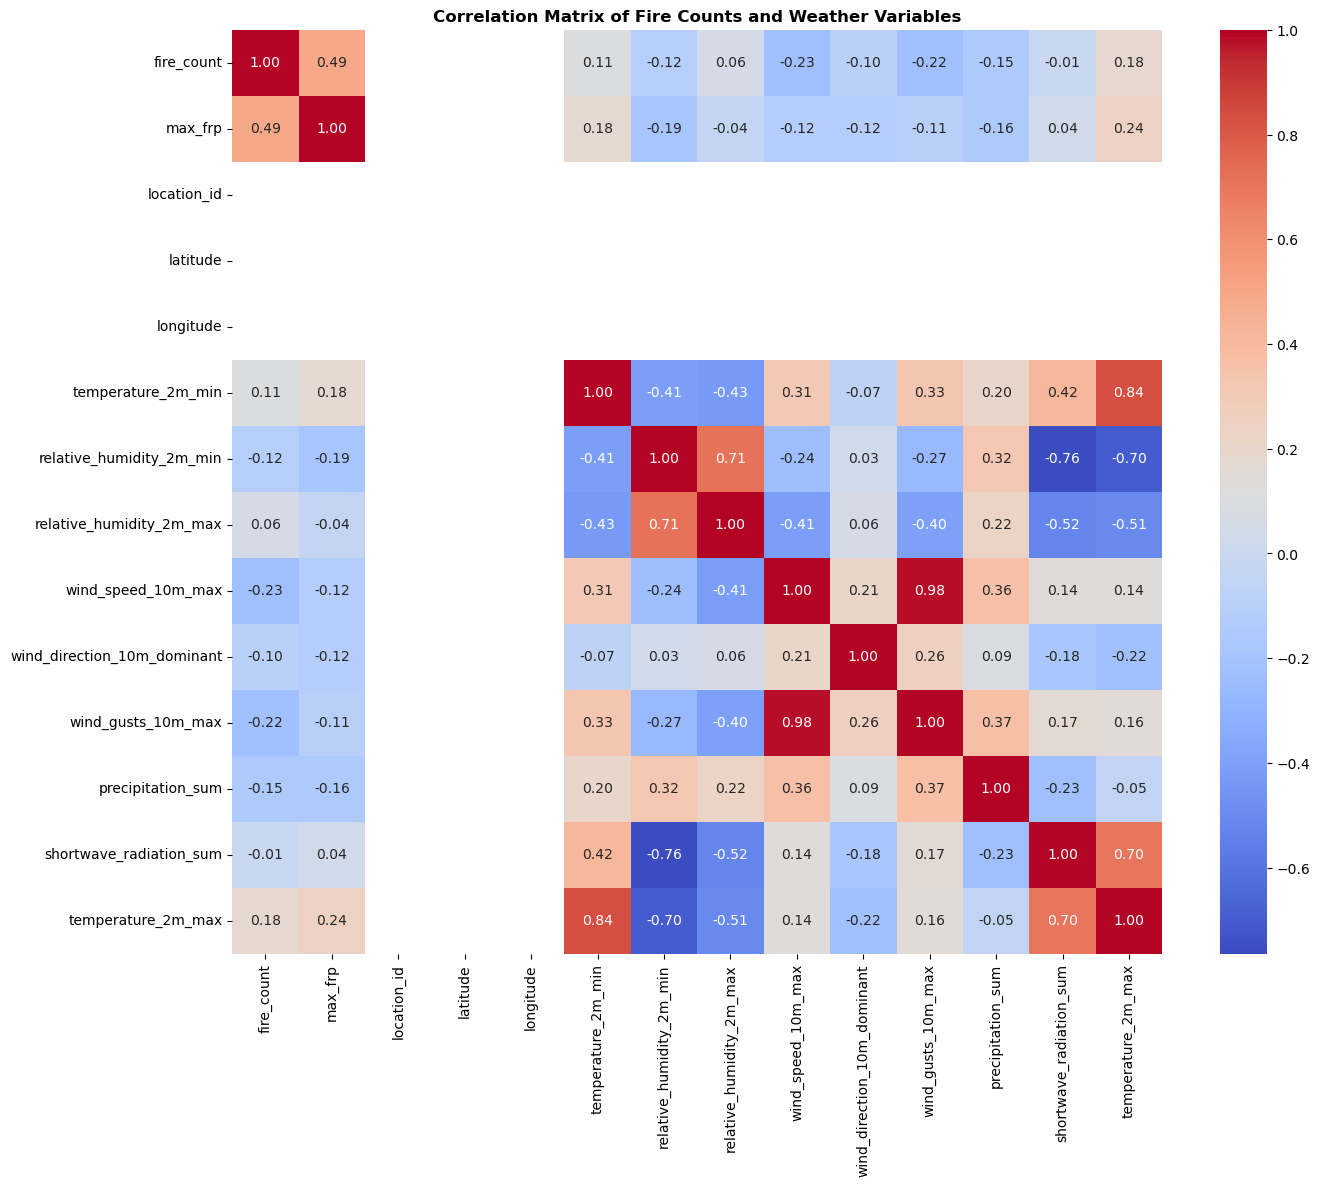

In [172]:
# Visualizing the correlation matrix with a heatmap
plt.figure(figsize=(15, 12))

sns.heatmap(
    correlation_matrix, 
    annot=True,      # Instruction to write the correlation numbers in the squares
    cmap='coolwarm', # Use a color map that indicates red is positive, blue is negative
    fmt=".2f"        # Numbers have two decimal places
)

plt.title('Correlation Matrix of Fire Counts and Weather Variables', fontweight='bold')
plt.show()

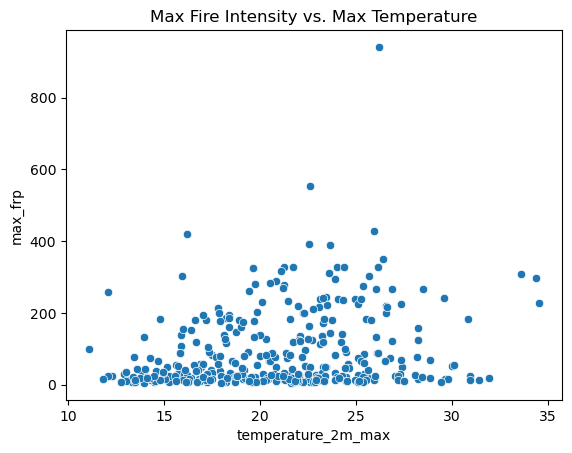

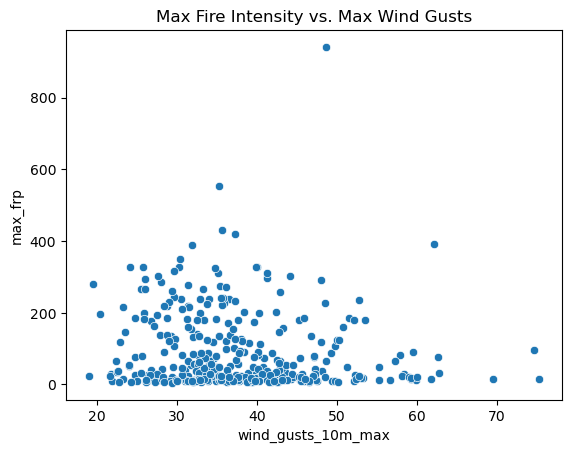

In [173]:
# How does fire intensity relate to temperature and wind gusts?
sns.scatterplot(data=merged_df, x='temperature_2m_max', y='max_frp')
plt.title('Max Fire Intensity vs. Max Temperature')
plt.show()

sns.scatterplot(data=merged_df, x='wind_gusts_10m_max', y='max_frp')
plt.title('Max Fire Intensity vs. Max Wind Gusts')
plt.show()